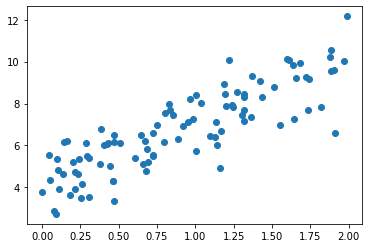

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X= 2 * np.random.rand(100,1) #uniformly distributed
y = 4 + 3 *X + np.random.randn(100,1)  #normally distributed 

plt.scatter(X,y)
plt.show()

In [2]:
#Normal Equation to find best theta value to minimize MSE
X_b = np.c_[np.ones((100,1)), X]  #adding x0 =1 to all instances
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.13495703],
       [2.92542479]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

y_predict


array([[4.13495703],
       [9.9858066 ]])

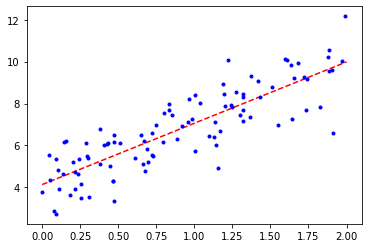

In [4]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X,y,"b.")
# plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print ( "Intercept and coefficient: ",lin_reg.intercept_ , lin_reg.coef_)

print(lin_reg.predict(X_new))

Intercept and coefficient:  [4.13495703] [[2.92542479]]
[[4.13495703]
 [9.9858066 ]]


In [6]:
#least squares using scipy
theta_best_svd , residuals, rank , s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print (theta_best_svd)
#theta = X+ (y) where X+ is pseudoinverse of X
#manaully calculated pseudoinverse
print (np.linalg.pinv(X_b).dot(y))


[[4.13495703]
 [2.92542479]]
[[4.13495703]
 [2.92542479]]


In [7]:
#calculating using Gradiant descent Batch

eta = 0.1
n_iternations = 1000
m = 100

theta = np.random.randn(2,1)

for i in range(n_iternations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta *gradients
theta

array([[4.13495703],
       [2.92542479]])

In [8]:
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients
theta

array([[4.16558417],
       [2.88783293]])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter= 1000, tol= 1e-3, penalty= None , eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [10]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14856091]), array([2.93674005]))

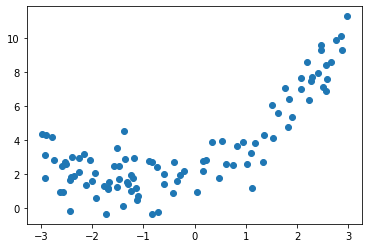

In [11]:
m = 100
X = 6 *np.random.rand(m,1) - 3
y = 0.5 * X**2 +X + 2 + np.random.randn(m,1)

plt.scatter(X,y)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias= False)

X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-1.23670352,  1.52943559])

In [13]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_poly, y)
lin_reg_1.coef_, lin_reg_1.intercept_
# this means it gives as y = 0.53X^2 + 1.03X + 1.8

(array([[1.15465204, 0.52374222]]), array([2.03675846]))

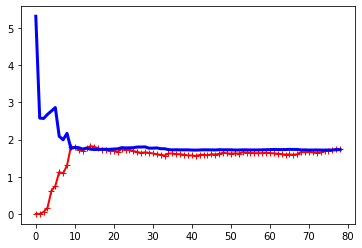

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def poly_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2 , label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
lin_reg = LinearRegression()
poly_learning_curves(lin_reg, X, y)

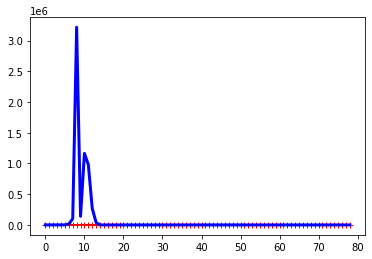

In [17]:
from sklearn.pipeline import Pipeline
polynomial_reg = Pipeline ([
     ("poly_features", PolynomialFeatures(degree = 10 , include_bias=False)),
     ("lin_reg", LinearRegression())
 ])
    
poly_learning_curves(polynomial_reg, X, y)

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha =1 , solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.52576493]])

In [19]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.49482505])

In [21]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler" , StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)